In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib

Mexico,Columbia and Peru it's based on these places

In [70]:
original_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [71]:
data = original_data.copy()

In [72]:
data.head(11)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [74]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [75]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [76]:
data.shape

(2111, 17)

Let's first make it easier to read

favc = frequently consumed high caloric food == freq_hcf
fcvc = how many vegetables do they have in their food == Veg_amount or Veg_total
ncp = how many meals a day == MPD
caec = do they have food in between their meals == snacks 
ch20 = how much water do you drink daily == daily_h20
scc = do you monitor your caloric intake ==  mon_cal_intake
faf = physical activity == Phy_activity
tue = technological usage == tech_use
calc = how often do you drink alcohol == alc_consumption
mtrans = Mode of Transportation == Transport
Nobeyesdad = Obesity Level == Obes_lvl

In [78]:
data = data.rename(columns = {'family_history_with_overweight':'Family_Overweight','FAVC':'High_Cal_Food',
                          'FCVC':'Veg_Intake','NCP':'Meals_Day','CAEC':'Snacks','SMOKE':'Smoker',
                          'CH2O':'Water_Day','SCC':'Cal_Monitor','FAF':'Phys_Activity','TUE':'Tech_Time',
                          'CALC':'Alc_Freq','MTRANS':'Transport','NObeyesdad':'Obesity_Lvl'})

In [79]:
data.head(11)

,Gender,Age,Height,Weight,Family_Overweight,High_Cal_Food,Veg_Intake,Meals_Day,Snacks,Smoker,Water_Day,Cal_Monitor,Phys_Activity,Tech_Time,Alc_Freq,Transport,Obesity_Lvl
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


let's now check for outliers

<Axes: >

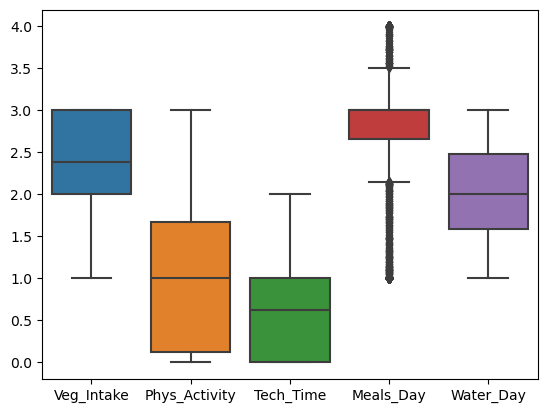

In [81]:
outlier_data = data[['Veg_Intake','Phys_Activity','Tech_Time','Meals_Day','Water_Day']]
sns.boxplot(data = outlier_data)

C:\Users\Swiss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


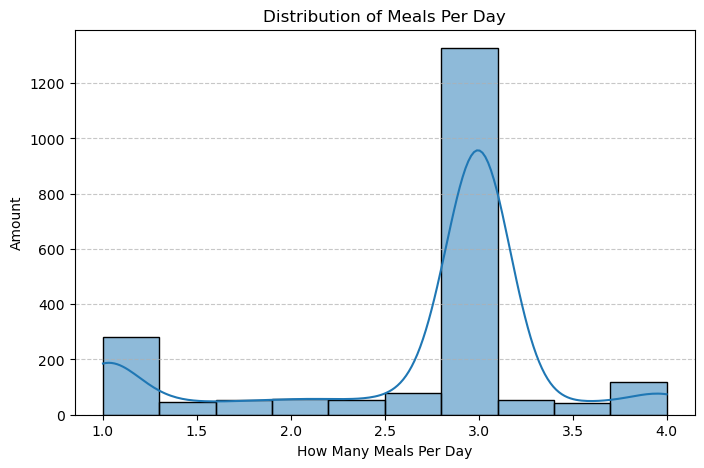

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(data['Meals_Day'],bins=10,kde=True)
plt.title('Distribution of Meals Per Day')
plt.xlabel('How Many Meals Per Day')
plt.ylabel('Amount')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

since we don't want the model to place alot of weight on the meals per day purely based on scale we will normalize all the continous variables so that it can have a even playing field 

In [84]:
from sklearn.preprocessing import MinMaxScaler

continous_var=['Veg_Intake','Phys_Activity','Tech_Time','Meals_Day','Water_Day']
scaler = MinMaxScaler()
data[continous_var] = scaler.fit_transform(data[continous_var])

<Axes: >

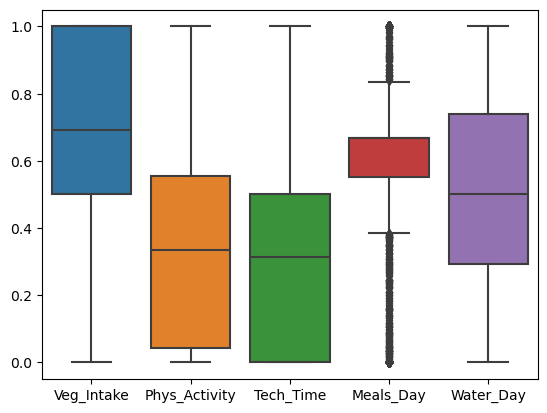

In [85]:
continous_var = data[['Veg_Intake','Phys_Activity','Tech_Time','Meals_Day','Water_Day']]
sns.boxplot(data = continous_var)

before we start are correlation analysis let's first make all the variables numeric

In [87]:
from sklearn.preprocessing import LabelEncoder


data['Family_Overweight'] = data['Family_Overweight'].map({'yes':1,'no':0})
data['High_Cal_Food'] = data['High_Cal_Food'].map({'yes':1,'no':0})
data['Cal_Monitor'] = data['Cal_Monitor'].map({'yes':1,'no':0})
data['Smoker'] = data['Smoker'].map({'yes':1,'no':0})

le = LabelEncoder()
data['Transport'] =le.fit_transform(data['Transport'])
data['Alc_Freq'] = le.fit_transform(data['Alc_Freq'])
data['Snacks'] = le.fit_transform(data['Snacks'])
data['Obesity_Lvl'] = le.fit_transform(data['Obesity_Lvl'])

# Check unique values in each column you're mapping
print(data['Family_Overweight'].unique())
print(data['High_Cal_Food'].unique())
print(data['Cal_Monitor'].unique())
print(data['Smoker'].unique())


[1 0]
[0 1]
[0 1]
[0 1]


In [88]:
data.head(11)

,Gender,Age,Height,Weight,Family_Overweight,High_Cal_Food,Veg_Intake,Meals_Day,Snacks,Smoker,Water_Day,Cal_Monitor,Phys_Activity,Tech_Time,Alc_Freq,Transport,Obesity_Lvl
0,Female,21.0,1.62,64.0,1,0,0.5,0.666667,2,0,0.5,0,0.000000,0.5,3,3,1
1,Female,21.0,1.52,56.0,1,0,1.0,0.666667,2,1,1.0,1,1.000000,0.0,2,3,1
2,Male,23.0,1.80,77.0,1,0,0.5,0.666667,2,0,0.5,0,0.666667,0.5,1,3,1
3,Male,27.0,1.80,87.0,0,0,1.0,0.666667,2,0,0.5,0,0.666667,0.0,1,4,5
4,Male,22.0,1.78,89.8,0,0,0.5,0.000000,2,0,0.5,0,0.000000,0.0,2,3,6
5,Male,29.0,1.62,53.0,0,1,0.5,0.666667,2,0,0.5,0,0.000000,0.0,2,0,1
6,Female,23.0,1.50,55.0,1,1,1.0,0.666667,2,0,0.5,0,0.333333,0.0,2,2,1
7,Male,22.0,1.64,53.0,0,0,0.5,0.666667,2,0,0.5,0,1.000000,0.0,2,3,1
8,Male,24.0,1.78,64.0,1,1,1.0,0.666667,2,0,0.5,0,0.333333,0.5,1,3,1
9,Male,22.0,1.72,68.0,1,1,0.5,0.666667,2,0,0.5,0,0.333333,0.5,3,3,1


We then seperate the data into 2 groups Positive Correlation and Negative Corrrelation

In [90]:
positive_correlations = data[['Family_Overweight','Meals_Day','High_Cal_Food','Snacks','Tech_Time','Alc_Freq','Obesity_Lvl']]
negative_correlations = data[['Cal_Monitor','Veg_Intake','Water_Day','Phys_Activity','Obesity_Lvl']]
netural_correlations = data[['Age','Height','Weight','Transport','Obesity_Lvl']]

Text(0.5, 1.0, 'Positive Correlations With Obesity')

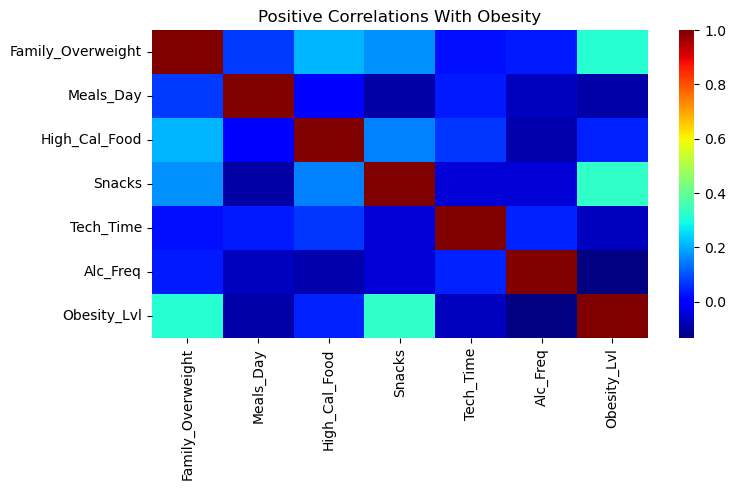

In [91]:
correlation = positive_correlations.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation,cmap='jet',fmt='.3f')
plt.title('Positive Correlations With Obesity')

Text(0.5, 1.0, 'Negative Correlation With Obesity')

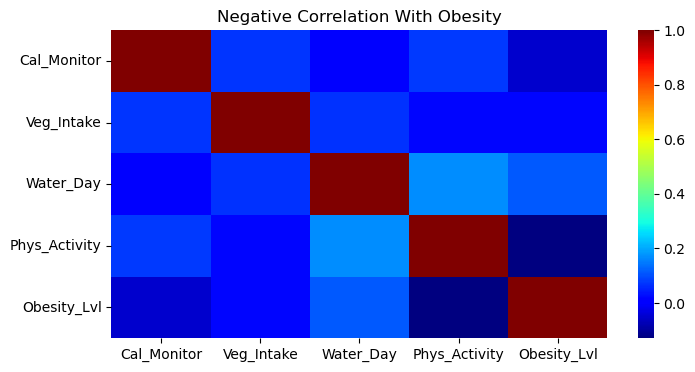

In [92]:
correlations=negative_correlations.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlations,cmap='jet',fmt='.3f')
plt.title('Negative Correlation With Obesity')

Text(0.5, 1.0, 'Netural Correlation With Obesity')

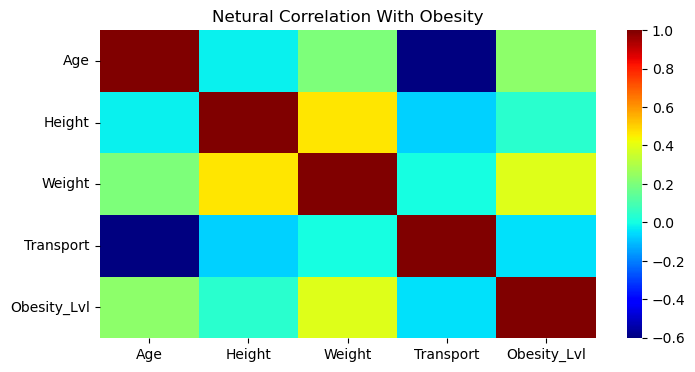

In [93]:
correlations=netural_correlations.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlations,cmap='jet',fmt='.3f')
plt.title('Netural Correlation With Obesity')

In [125]:
# checkpoint
data.to_csv('Obesity_Preprocessed.csv')

In [95]:
features = ['Age','Weight','Snacks','Family_Overweight','Water_Day','High_Cal_Food']

X = data[features]
y = data['Obesity_Lvl']

These features were selected based on their correlation with obesity, ensuring that only the most relevant variables are included. Variables with low correlation were excluded to minimize the risk of overfitting and improve the model's generalization performance.

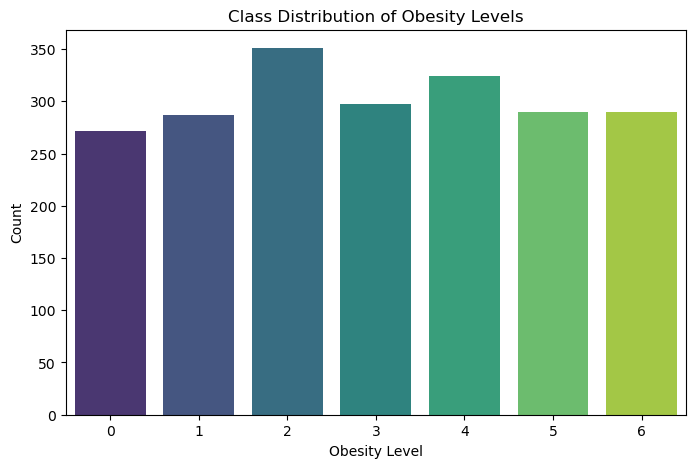

Obesity_Lvl
2    0.166272
4    0.153482
3    0.140692
5    0.137376
6    0.137376
1    0.135955
0    0.128849
Name: proportion, dtype: float64


In [96]:
plt.figure(figsize=(8,5))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution of Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.show()


print(y.value_counts(normalize=True)) 


To assess the need for re-balancing techniques such as SMOTE or class weighting, we first examine the class distribution. Since all classes are well-represented, there is no need for re-sampling or re-weighting adjustments.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
# Split dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.87


Test Accuracy: 0.85

Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.65      0.79      0.72        43
           2       0.86      0.83      0.85        53
           3       1.00      0.93      0.97        45
           4       0.94      0.98      0.96        48
           5       0.77      0.79      0.78        43
           6       0.81      0.80      0.80        44

    accuracy                           0.85       317
   macro avg       0.86      0.85      0.85       317
weighted avg       0.86      0.85      0.85       317



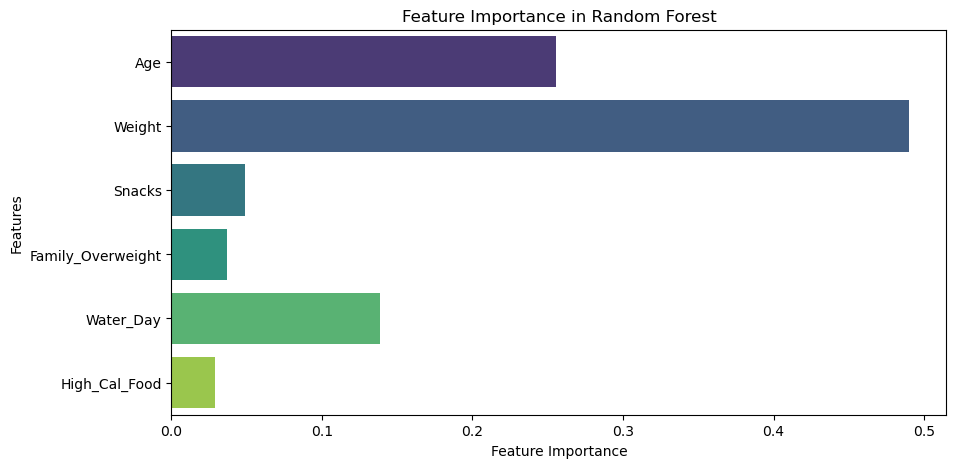

In [66]:
# If accuracy is good, test on the unseen test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nFinal Test Classification Report:\n", classification_report(y_test, y_test_pred))

feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

Overall, the model performed well, achieving an accuracy (precision) of 86% and a sensitivity (recall) of 85%. However, some fine-tuning may still be beneficial, as Group 1 and Group 5 exhibited the lowest performance, with precision of 65% and 77%, respectively, and recall of 79%.

Since the validation accuracy and test accuracy are similar, there are no indications of overfitting, suggesting the model generalizes well to unseen data.